# DataFrame Generation and Analysis for Comparison

In [1]:
from TCSPC import *

In [2]:
EGFP = Phasor([0.497,0.503],[2.43,3.07])

### Update on Phasor.generate_df() 11/03/2024

OptimizeResult from `scipy.optimize.root()` is used to generate df\
It includes success, nfev, and parameter results \
Access the `df` using `EGFP.df`\
Background is removed in EGFP.phasor_data

In [8]:
def repeat_sim_n(sim,n_photon_arr = np.logspace(4,9,20).astype(int),n_repeat = 100):
    '''Store results of simulations for Simulation object sim 
    of n_photon in n_photon_arr (default  np.logspace(6,10,100).astype(int))
    Input:
    sim            Simulation Object
    n_photon_arr   Number of photons (collected in total) array
    n_repeat       Number of repeats in simulation
    '''
    sim.y_list = np.zeros((len(n_photon_arr),n_repeat,380)) #array to store 100 simulations of time domain data for each n_photon
    sim.y_bg_list= np.zeros((len(n_photon_arr),n_repeat,380))
    sim.phasor_list = np.zeros((len(n_photon_arr),n_repeat,380),dtype = complex) #array to store phasors from simulations of different n_photon
    sim.phasor_bg_list = np.zeros((len(n_photon_arr),n_repeat,380),dtype = complex) #with background
    for i in range(len(n_photon_arr)):
        sim.n_photon = n_photon_arr[i] #set n_photon
        sim.repeat_sim(n_repeat) #generate 100 simulations
        sim.y_list[i] = sim.sim_data- sim.run_time*sim.bg/sim.n_bins#store 100 decays, no bg
        sim.y_bg_list[i] = sim.sim_data  #store 100 decays, with bg
        sim.phasor_list[i] = sim.phasor_data #store 100 phasors, no bg
        w,sim.phasor_bg_list[i] = sim.phasor_fft(sim.sim_data) #phasor with backhround

In [9]:
repeat_sim_n(EGFP) #access the data from EGFP.y_list, EGFP.y_bg_list, EGFP.phasor_list and EGFP.phasor_bg_list

In [13]:
#np.save('df/EGFP_data',[EGFP.y_list,EGFP.y_bg_list,EGFP.phasor_list,EGFP.phasor_bg_list])
EGFP.y_list,EGFP.y_bg_list,EGFP.phasor_list,EGFP.phasor_bg_list = np.load('df/EGFP_data.npy')

In [ ]:
n_photon_arr = np.logspace(4,9,20)
df_list = []   #mle
df_ls_list = [] #least squares
df_p_list = [] #phasor
N=2 #N components
for i in range(len(n_photon_arr)):
    df_bg = EGFP.val_df(N,sim_data=EGFP.y_bg_list[i])
    df_no_bg = EGFP.val_df(N,sim_data=EGFP.y_list[i],bg=False)
    df_rescale= EGFP.val_df(N,sim_data=EGFP.y_list[i],rescale = True)
    df_no_bg_rescale= EGFP.val_df(N,sim_data=EGFP.y_no_bg_list[i],r=30,rescale = True,bg=False)
    df_list.append([df_bg,df_no_bg,df_rescale,df_no_bg_rescale])

for i in range(len(n_photon_arr)):
    df_bg = EGFP.val_df(N,sim_data=EGFP.y_bg_list[i])
    df_no_bg = EGFP.val_df(N,sim_data=EGFP.y_list[i],bg=False)
    df_rescale= EGFP.val_df(N,sim_data=EGFP.y_list[i],rescale = True)
    df_no_bg_rescale= EGFP.val_df(N,sim_data=EGFP.y_no_bg_list[i],r=30,rescale = True,bg=False)
    df_ls_list.append([df_bg,df_no_bg,df_rescale,df_no_bg_rescale])

for i in range(len(n_photon_arr)):
    df_bg_1 = EGFP.generate_df(phasor_data = EGFP.phasor_bg_list,idx = None)
    df_bg_2 = EGFP.generate_df(phasor_data = EGFP.phasor_bg_list,idx = [0,2,4]) #use harmonics aside from first
    df_no_bg = EGFP.val_df(N,sim_data=EGFP.y_list[i],bg=False)
    df_p_list.append([df_bg,df_no_bg,df_rescale,df_no_bg_rescale])

In [15]:
EGFP.n_photon = int(1e3)
EGFP.repeat_sim(100)
EGFP.generate_df()
EGFP.df[['A1','tau1','tau2','nfev','success']]

,A1,tau1,tau2,nfev,success
0,0.201923,2.762317,2.762473,43,False
1,0.486044,2.375653,3.274018,10,True
2,0.606226,1.467068,3.906668,21,True
3,0.513895,2.735839,2.736137,46,False
4,0.375873,2.871141,2.870805,41,False
...,...,...,...,...,...
95,0.492694,2.357598,3.214670,10,True
96,0.514800,2.707389,2.706883,42,False
97,0.530908,2.079440,3.093987,12,True
98,0.521030,2.064940,3.234333,14,True


In [5]:
EGFP.mle_df

,index,c,A1,A2,tau1,tau2,red_chi2,nfev
0,0,0.084719,0.254978,0.745022,78.824935,4.073856,0.605433,389
1,0,0.045773,0.297501,0.702499,2.905772,3.230934,0.528555,234
2,0,0.007180,0.401589,0.598411,2.679670,3.109499,0.556555,192
3,0,4.049852,0.345434,0.654566,0.381337,3.350363,0.655827,531
4,0,0.143076,0.309904,0.690096,25.606230,3.472929,0.793312,377
...,...,...,...,...,...,...,...,...
95,0,1.838894,0.463265,0.536735,0.002977,3.918069,0.443978,526
96,0,0.239666,0.404777,0.595223,4.063224,3.629763,0.617612,361
97,0,2.253826,0.362358,0.637642,0.626858,3.030832,0.997464,268
98,0,1.569289,0.476159,0.523841,0.000048,3.393099,0.376341,541


In [4]:
EGFP.df[EGFP.df.success ==False]

,x,success,status,method,nfev,fjac,r,qtf,fun,message,A1,tau1,tau2
1,"[0.5011856755471932, 2.7325163205083927, 2.730...",False,4,hybr,44,"[[-3.044067699531361e-05, -0.7861609240803407,...","[0.0009779028730115425, 0.1137886165878063, 0....","[-4.418855791367415e-06, 0.010463316175620116,...","[0.0, -0.006483535745354985, 0.008238191005584...","The iteration is not making good progress, as ...",0.501186,2.732516,2.730982
9,"[0.4416770040464863, 2.822846822822115, 2.8229...",False,4,hybr,43,"[[-0.0024243776722239208, 0.798832442997785, 0...","[1.3916020147153121e-05, -0.0965202175681563, ...","[4.806330047617442e-05, -0.00552850581514195, ...","[3.3306690738754696e-16, -0.011927437572597399...","The iteration is not making good progress, as ...",0.441677,2.822847,2.822911
10,"[0.4319244078714909, 2.9990712754179762, 2.998...",False,5,hybr,36,"[[-2.4644134806028333e-07, 0.8265143628386119,...","[0.0011839290364497523, -0.08945570176668458, ...","[-6.349523214607332e-06, 0.0004876480271989477...","[3.3306690738754696e-16, -0.000279964290579304...","The iteration is not making good progress, as ...",0.431924,2.999071,2.998878
11,"[0.765017732255497, 2.654216738289106, 2.67757...",False,5,hybr,38,"[[-1.2387889732032061e-07, -0.7845478438741069...","[0.006438992446501013, 0.13871838117692248, 0....","[4.6593627591883e-06, 0.01031406485733645, 6.8...","[-1.1102230246251565e-16, -0.00639908002232103...","The iteration is not making good progress, as ...",0.765018,2.654217,2.677578
12,"[0.4673799877722433, 2.785385289347087, 2.7885...",False,5,hybr,29,"[[-2.0993381811607037e-05, -0.7936757927712768...","[0.0015183660711135798, 0.10385653931964539, 0...","[-0.00011767753017724245, 0.04053144543114584,...","[-1.1102230246251565e-16, -0.02467304402907244...","The iteration is not making good progress, as ...",0.467380,2.785385,2.788521
13,"[0.5549128113484892, 2.7638420215895096, 2.761...",False,4,hybr,41,"[[0.0, 0.7904227441441679, 0.6125617401859205]...","[-0.0005893736557899789, -0.12492058862760737,...","[-1.170391223192721e-06, 0.005411402580581292,...","[1.1102230246251565e-16, -0.003313306703303542...","The iteration is not making good progress, as ...",0.554913,2.763842,2.761257
19,"[0.32826047901591754, 2.8018343324369526, 2.80...",False,5,hybr,39,"[[-2.1456076314306778e-05, -0.7901900097009604...","[-0.0021251356382739894, 0.0725286918780283, 0...","[-6.531969531538783e-05, 0.006072482983485649,...","[-1.1102230246251565e-16, -0.00366998952554198...","The iteration is not making good progress, as ...",0.328260,2.801834,2.801086
20,"[0.4259958711194225, 2.97268599455121, 2.97146...",False,5,hybr,40,"[[1.5363256706200634e-12, 0.8148018609799308, ...","[-0.0002570515626222866, -0.08737306904010815,...","[8.100718325155468e-06, 0.0029563558717744607,...","[0.0, -0.0017073158952298773, 0.00241354057270...","The iteration is not making good progress, as ...",0.425996,2.972686,2.971469
21,"[0.48811332258357887, 2.7998651665537215, 2.80...",False,5,hybr,40,"[[-8.733533341700115e-05, 0.8102573748180009, ...","[0.00034969607834010543, -0.10757859294350797,...","[-0.0002439386632786646, 0.00933968816776432, ...","[0.0, -0.005671437743686614, 0.007424632451935...","The iteration is not making good progress, as ...",0.488113,2.799865,2.801524
23,"[0.3523287863249215, 2.8138986163073643, 2.822...",False,5,hybr,38,"[[-2.380581918171032e-05, -0.7977806124202383,...","[-0.0017765967134422095, 0.07700615997872053, ...","[-0.00010554120930892849, 0.027266381909090382...","[1.1102230246251565e-16, -0.016362106376873742...","The iteration is not making good progress, as ...",0.352329,2.813899,2.822018


In [5]:
n_photon_arr = np.logspace(3,8,40)
df_low_list = [] #for low number of photon count
for n_photon in n_photon_arr:
    EGFP.n_photon = n_photon
    EGFP.repeat_sim(100)
    EGFP.generate_df()
    df_low_list.append(EGFP.df)
df_low = pd.concat(df_low_list,keys = range(len(n_photon_arr)))

In [6]:
df_low 

x  success  status  \
0  0   [0.4571603807578672, 2.8250724686205735, 2.825...    False       5   
   1   [0.5409135815936169, 2.097132433187414, 2.9480...     True       1   
   2   [0.8219834688255351, 2.8616821961225116, 2.863...    False       5   
   3   [0.49466218208759793, 2.6722465706832796, 2.67...    False       5   
   4   [0.4643393072023538, 2.8534290169982803, 2.853...    False       5   
...                                                  ...      ...     ...   
39 95  [0.49676048735754524, 2.4354074620126736, 3.06...     True       1   
   96  [0.49716195915617467, 2.4245686609003947, 3.07...     True       1   
   97  [0.4970699171934715, 2.4281235284966023, 3.071...     True       1   
   98  [0.49710499491336, 2.427963135443712, 3.071276...     True       1   
   99  [0.4970178282425608, 2.4284591082606646, 3.071...     True       1   

      method  nfev                                               fjac  \
0  0    hybr    40  [[-2.0663771577441363e-12, -0.8105247461754915...   
   1    hybr    13  [[-4.1718958319191767e-07, 0.7737507463603123,...   
   2    hybr    43  [[0.00013293309285548392, 0.6440264009487926, ...   
   3    hybr    40  [[-0.0002994701020076961, 0.7922424207565553, ...   
   4    hybr    37  [[0.0002131048147083806, -0.5908498319315036, ...   
...      ...   ...                                                ...   
39 95   hybr     9  [[-4.244959501447806e-07, 0.7851578944145893, ...   
   96   hybr    22  [[0.11702905730946275, -0.7796884442985567, -0...   
   97   hybr     7  [[-4.206614376990313e-07, 0.785222222071035, 0...   
   98   hybr     7  [[-4.2066129280504106e-07, 0.7852170730350607,...   
   99   hybr     7  [[-4.2064036686217487e-07, 0.7852285721120651,...   

                                                       r  \
0  0   [0.002087572664906296, 0.09974560843949158, 0....   
   1   [0.14551150249441816, -0.11398939041472769, -0...   
   2   [-0.00020456996419016376, -0.17116327392472513...   
   3   [0.00020115018718922336, -0.1151736729648942, ...   
   4   [-7.593413765043483e-05, 0.09589419583585958, ...   
...                                                  ...   
39 95  [0.14113870731026867, -0.09947697452748411, -0...   
   96  [-0.14582774971644244, 0.0988769452417448, 0.1...   
   97  [0.1425479855720583, -0.09894627110217333, -0....   
   98  [0.14254804720035696, -0.09895174434208838, -0...   
   99  [0.14254883586905015, -0.09894373646526028, -0...   

                                                     qtf  \
0  0   [0.0002938529048959583, 0.013521126028341116, ...   
   1   [8.899013856710158e-11, 7.976272523172814e-12,...   
   2   [0.0030358012411660067, 0.012737293957722341, ...   
   3   [-0.00023789219314743378, -0.01005790074492518...   
   4   [-0.011104523092388616, -0.03581088648133161, ...   
...                                                  ...   
39 95  [4.774261289656585e-12, -7.599466163492545e-13...   
   96  [-1.731256125788853e-16, -1.0887795615739343e-...   
   97  [1.786081566050599e-10, -1.9773865054881385e-1...   
   98  [1.8822502176020873e-10, -2.0535510626118994e-...   
   99  [1.603794135817942e-10, -1.6310848139374685e-1...   

                                                     fun  \
0  0   [1.1102230246251565e-16, -0.008157557962616746...   
   1   [-1.1102230246251565e-16, 6.380329597988066e-1...   
   2   [0.0, -0.007788936910955391, 0.010525552950027...   
   3   [-4.440892098500626e-16, -0.006321978218330915...   
   4   [-2.220446049250313e-16, -0.02233046464039523,...   
...                                                  ...   
39 95  [-4.440892098500626e-16, 5.129230373768223e-14...   
   96                  [0.0, 2.220446049250313e-16, 0.0]   
   97  [-2.220446049250313e-16, -1.687538997430238e-1...   
   98  [-4.440892098500626e-16, -3.941291737419306e-1...   
   99  [-6.661338147750939e-16, -5.000999614424018e-1...   

                                                 message        A1      tau1  \
0  0   The

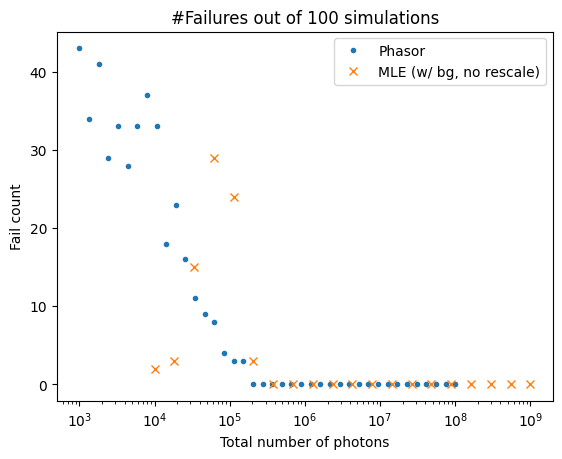

In [18]:
fail_count = np.zeros(40)
fail = df_low[df_low.success==False].groupby(level=0).size()
fail_count[:len(fail)] = fail
n_photon_arr = np.logspace(3,8,40).astype(int)
n_photon_arr2, fail_count_fit = np.loadtxt('Book3.csv',delimiter = ',',skiprows = 1,unpack = True)

plt.figure()
plt.title('#Failures out of 100 simulations')
plt.plot(n_photon_arr,fail_count,'.',label = 'Phasor')
plt.plot(n_photon_arr2,fail_count_fit,'x',label = 'MLE (w/ bg, no rescale)')
plt.xscale('log')
plt.xlabel('Total number of photons')
plt.ylabel('Fail count')
plt.legend()
plt.savefig('fig/fail_compare.pdf')


In [20]:
EGFP.n_photon = n_photon_arr[fail_count == 0][0]
EGFP.multi_exp_data()
np.max(EGFP.y2)

3842

In [16]:
n_photon_arr2[fail_count_fit==0][0]

379269.0190732254

In [21]:
n_photon_arr = np.logspace(3,8,20)
repeat_sim_n(EGFP,n_photon_arr)

NameError: name 'n' is not defined